---
title: Plotting with Python
---

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style("darkgrid")

# make graphics sharper on a good screen
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
plt.scatter(penguins.bill_length_mm, penguins.flipper_length_mm) ;  # semi colon makes last value None

In [4]:
sns.set_style("ticks")
# sns.set_style("darkgrid")
# sns.set_style("whitegrid")
# sns.set_style("white")
# sns.set_style("dark")

plt.scatter(penguins.bill_length_mm, penguins.flipper_length_mm)
sns.despine()

In [5]:
plt.hist(penguins.bill_length_mm) ;

# Better plotting with seaborn (on top of matplotlib)

In [6]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm") ;

In [11]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species") ;

In [12]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", style="sex") ;

In [13]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", 
                style="sex", size="body_mass_g") ;

In [14]:
def legend_outside():
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [15]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", hue="species", style="sex", size="body_mass_g") ;

legend_outside()

plt.title("Penguin measurements")
plt.ylabel("flipper length (mm)")
plt.xlabel("bill length in (mm)") ;

# Wide or long data

Wide format data:

In [16]:
penguins[['bill_length_mm', 'bill_depth_mm']]

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3
...,...,...
339,NaN,NaN
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


Long format data:

In [17]:
long_df = penguins.melt(value_vars=['bill_length_mm', 'bill_depth_mm'])
long_df

,variable,value
0,bill_length_mm,39.1
1,bill_length_mm,39.5
2,bill_length_mm,40.3
3,bill_length_mm,NaN
4,bill_length_mm,36.7
...,...,...
683,bill_depth_mm,NaN
684,bill_depth_mm,14.3
685,bill_depth_mm,15.7
686,bill_depth_mm,14.8


long format is required when you want a number of columns to appear as a "variable" in the plot. As in the example below where the color "variable" reflects whether the point is `bill_depth_mm` or `bill_length_mm`.

Retain other information for each observation:

In [18]:
long_df = penguins.melt(id_vars=['species', 'body_mass_g', 'island'], value_vars=['bill_length_mm', 'bill_depth_mm'])
long_df

,species,body_mass_g,island,variable,value
0,Adelie,3750.0,Torgersen,bill_length_mm,39.1
1,Adelie,3800.0,Torgersen,bill_length_mm,39.5
2,Adelie,3250.0,Torgersen,bill_length_mm,40.3
3,Adelie,NaN,Torgersen,bill_length_mm,NaN
4,Adelie,3450.0,Torgersen,bill_length_mm,36.7
...,...,...,...,...,...
683,Gentoo,NaN,Biscoe,bill_depth_mm,NaN
684,Gentoo,4850.0,Biscoe,bill_depth_mm,14.3
685,Gentoo,5750.0,Biscoe,bill_depth_mm,15.7
686,Gentoo,5200.0,Biscoe,bill_depth_mm,14.8


In [19]:
sns.scatterplot(data=long_df, x='body_mass_g', y='value', hue='variable', style='species')
legend_outside()

In [20]:
sns.boxplot(data=long_df, x='species', y='value', hue='variable') ;

In [21]:
sns.boxplot(data=long_df, x='variable', y='value', hue='species') ;

In [22]:
sns.boxplot(data=long_df, x='species', y='value', hue='variable') ;

# Plots with multiple facets

In [23]:
g = sns.FacetGrid(penguins, col="island")
g ;

Map plotting to each facet:

In [28]:
g = sns.FacetGrid(penguins, col="island", hue="species", height=3)
g.map(sns.scatterplot, "bill_length_mm", "flipper_length_mm") ;

Grid of facets representing combinations of two variables:

In [29]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species", height=3) ;
g.map(sns.scatterplot, "bill_length_mm", "flipper_length_mm") ;

In [30]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species", height=3) ;
g.map(sns.regplot, "bill_length_mm", "flipper_length_mm") ;

In [31]:
sns.lmplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", row="sex", col="island", hue="species", height=2) ;

## FacetGrid.map vs. FacetGrid.map_dataframe

When you use `FacetGrid.map(func, "col1", "col2", ...)`, the function `func` is passed the values of the columns `"col1"` and `"col2"` (and more if needed) as parameters 1 and 2 (`args[0]`, `args[1]`, ...). In addition, the function always receives a keyword argument named `color=`.

In [32]:
def scatter(*args, **kwargs):
    return plt.scatter(args[0], args[1], **kwargs)
    
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species") ;
g.map(scatter, "bill_length_mm", "flipper_length_mm") ;

When you use `FacetGrid.map_dataframe(func, "col1", "col2", ...)`, the function `func` is passed the names `"col1"` and `"col2"` (and more if needed) as parameters 1 and 2 (`args[0]`, `args[1]`, ...), and the filtered dataframe as keyword argument `data=`. In addition, the function always receives a keyword argument named `color=`.

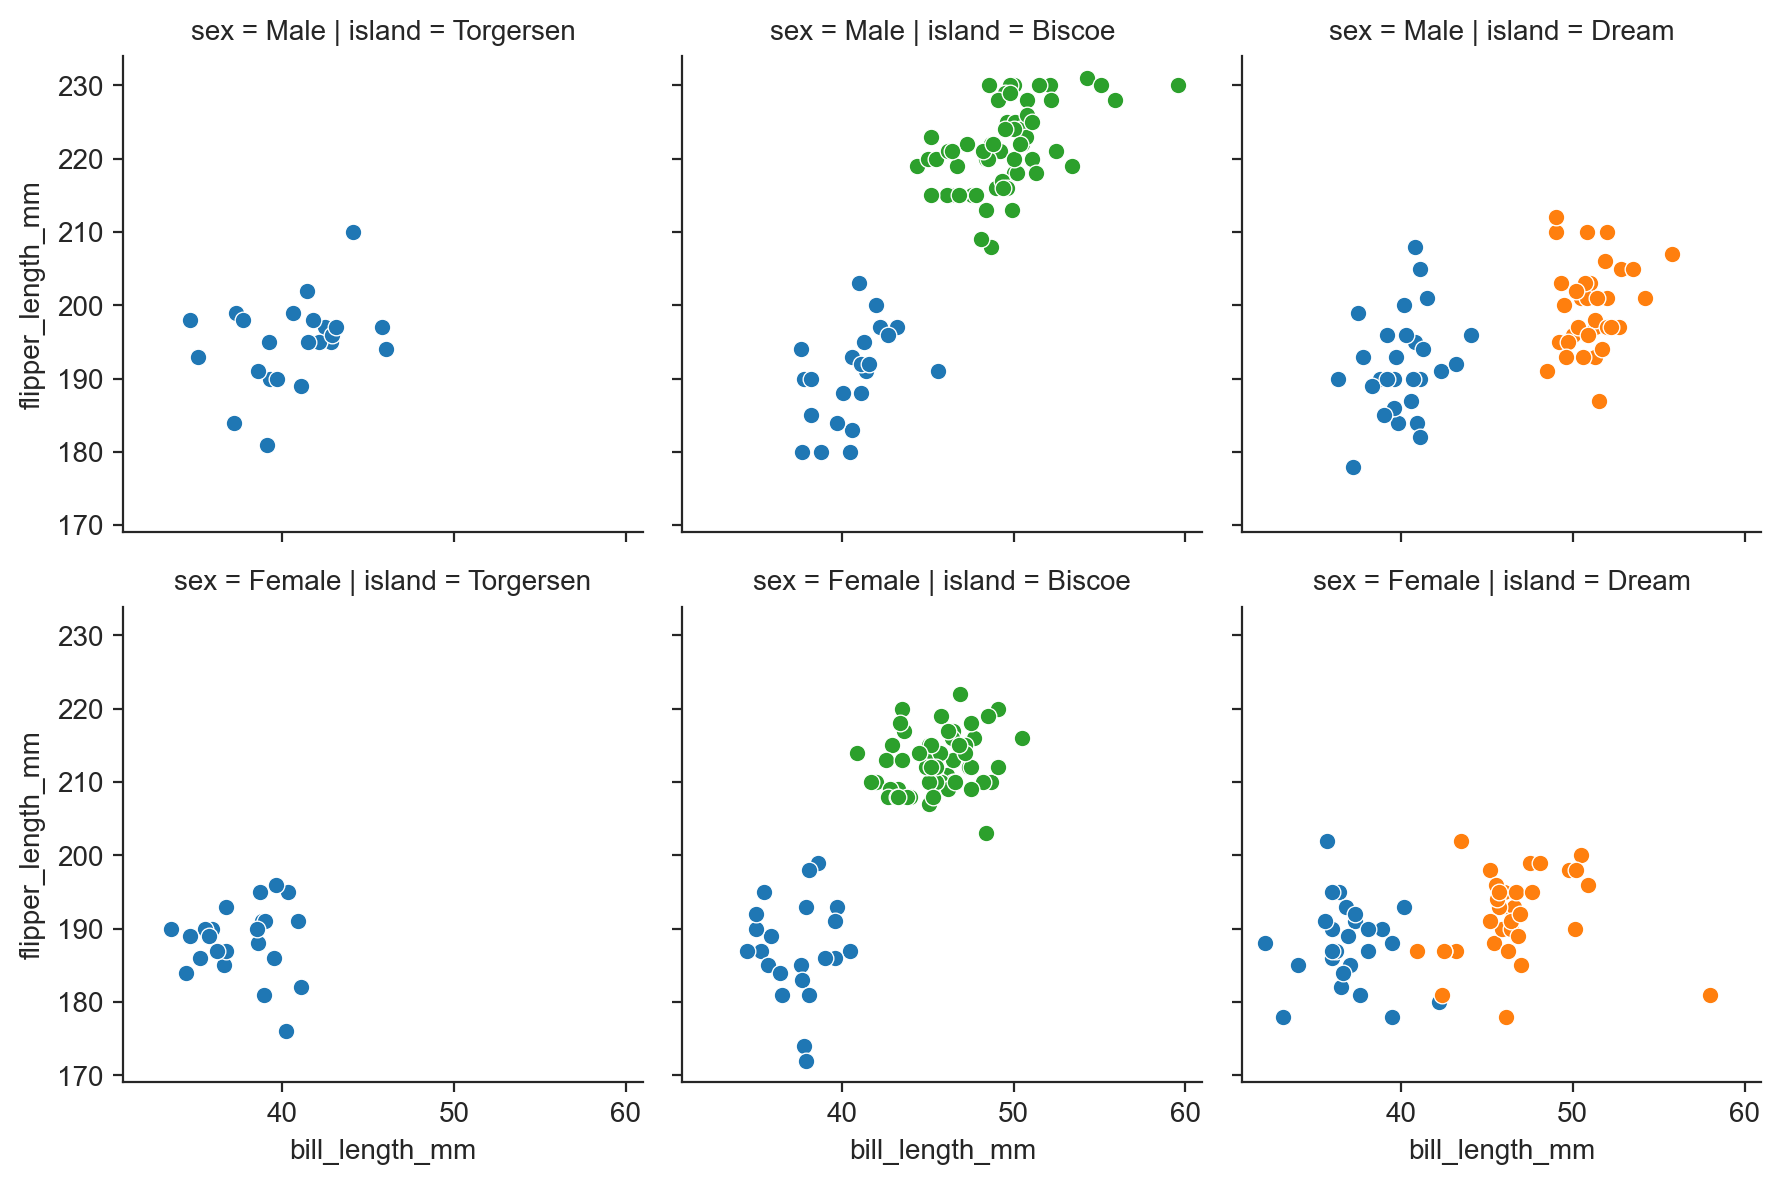

In [101]:
def scatterplot(*args, **kwargs):
    return sns.scatterplot(x=args[0], y=args[1], **kwargs)

g = sns.FacetGrid(penguins, row="sex", col="island", hue="species") ;
g.map_dataframe(scatterplot, "bill_length_mm", "flipper_length_mm") ;

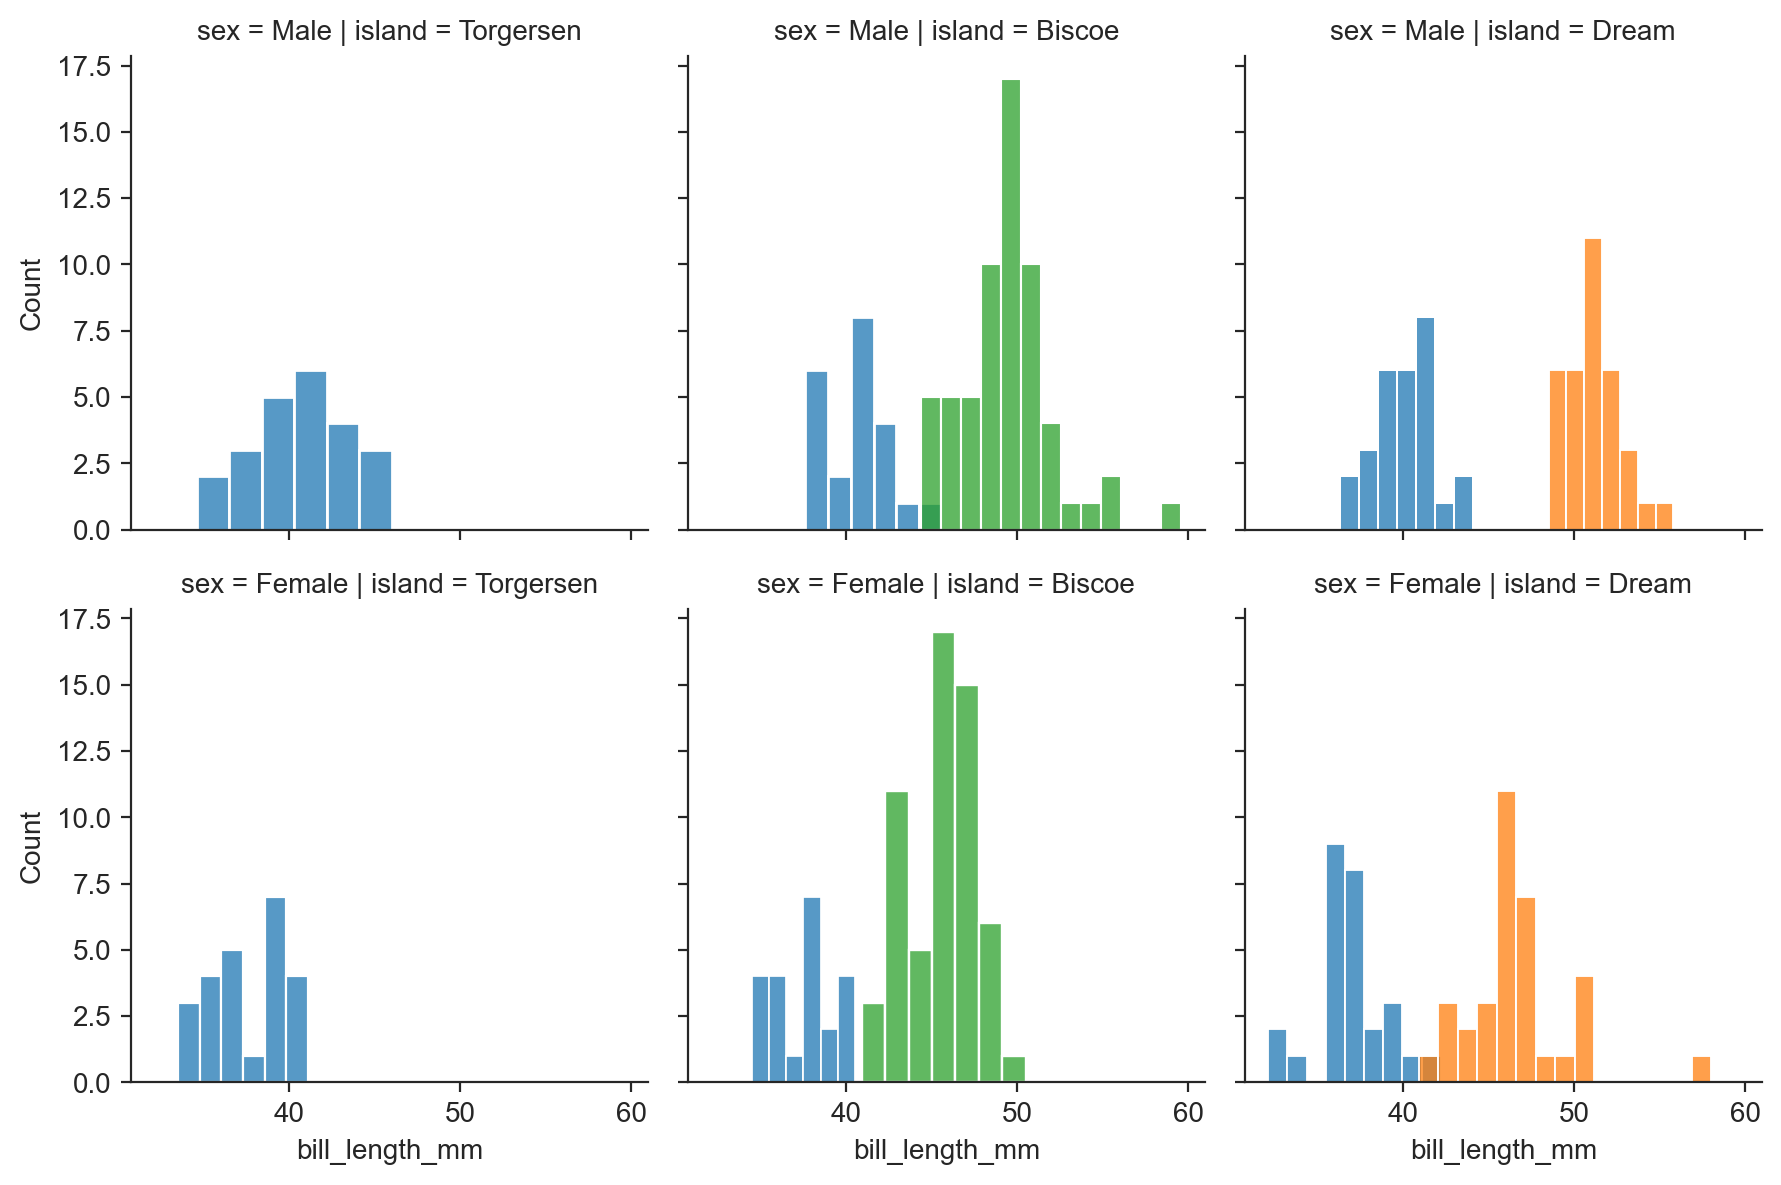

In [102]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species") ;
g.map(sns.histplot, "bill_length_mm") ;

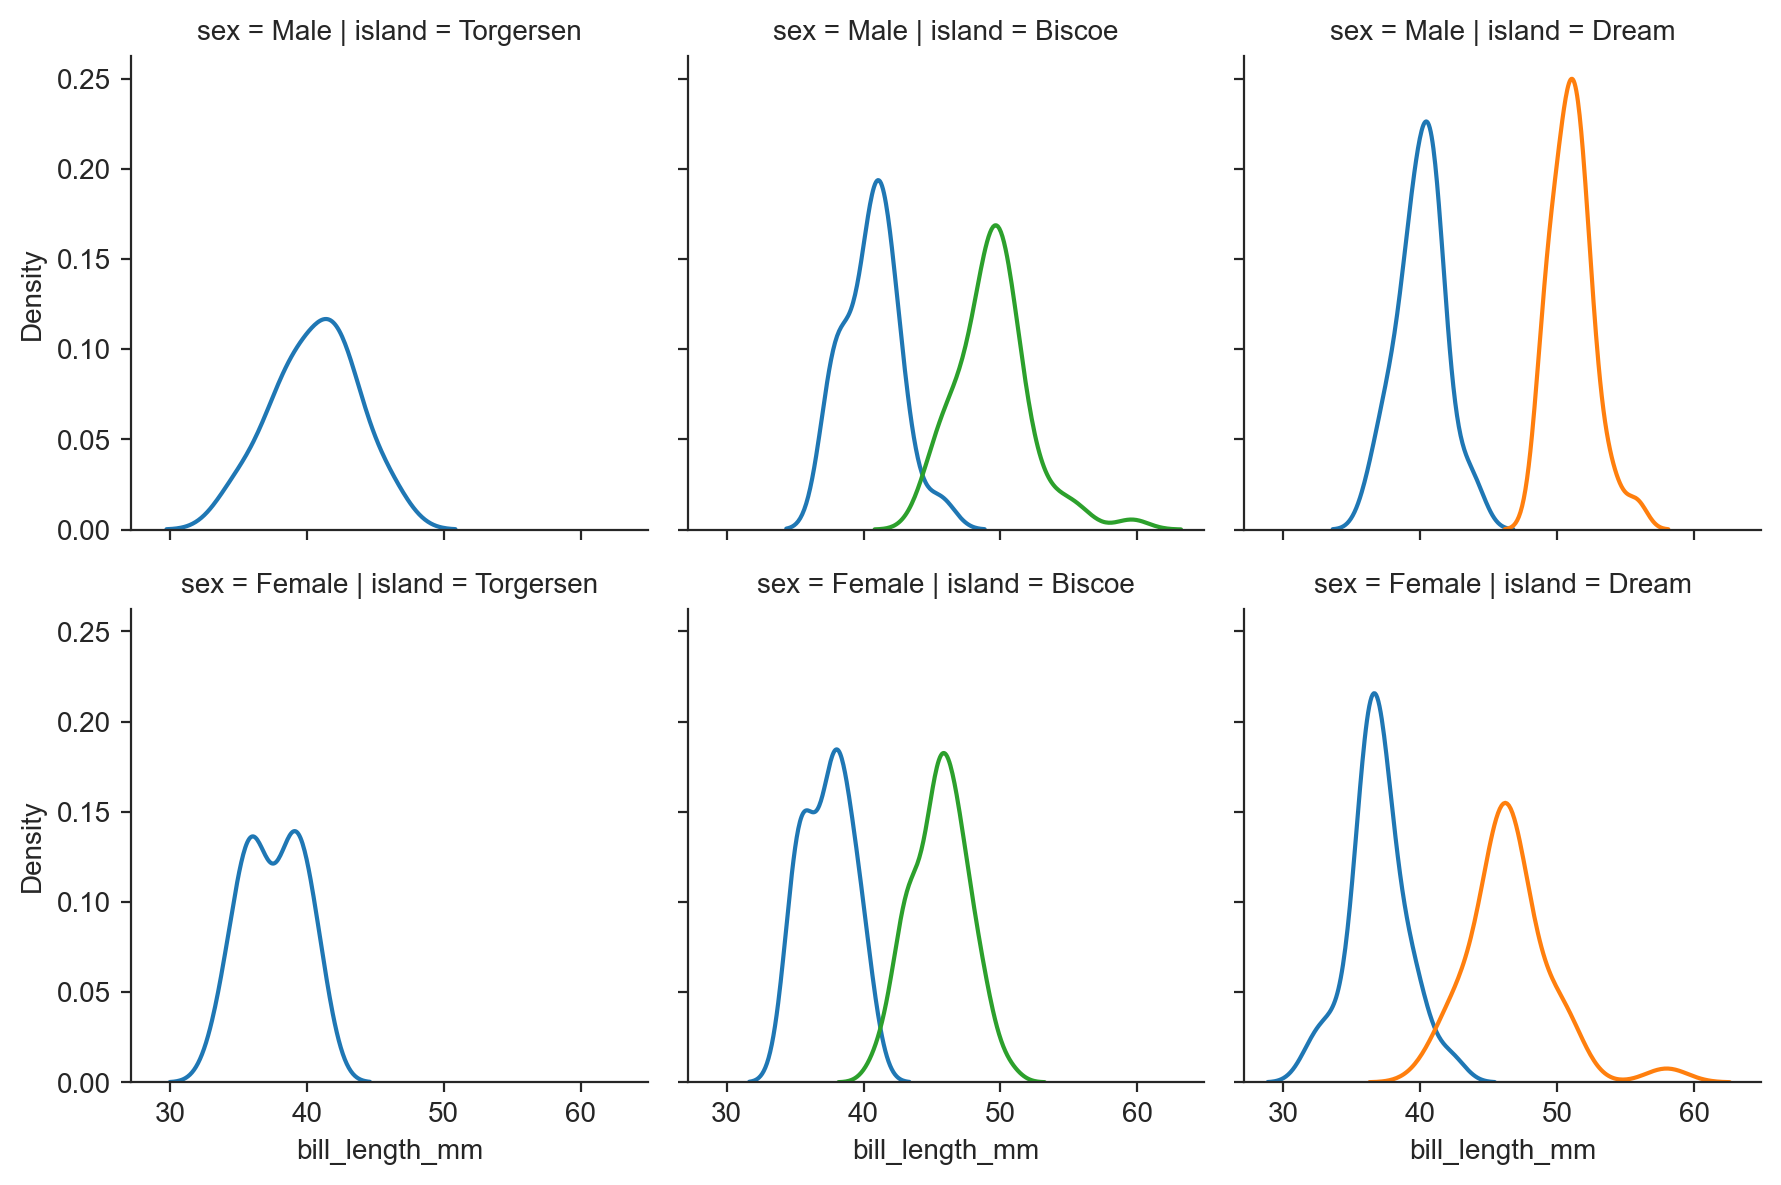

In [103]:
g = sns.FacetGrid(penguins, row="sex", col="island", hue="species") ;
g.map(sns.kdeplot, "bill_length_mm") ;

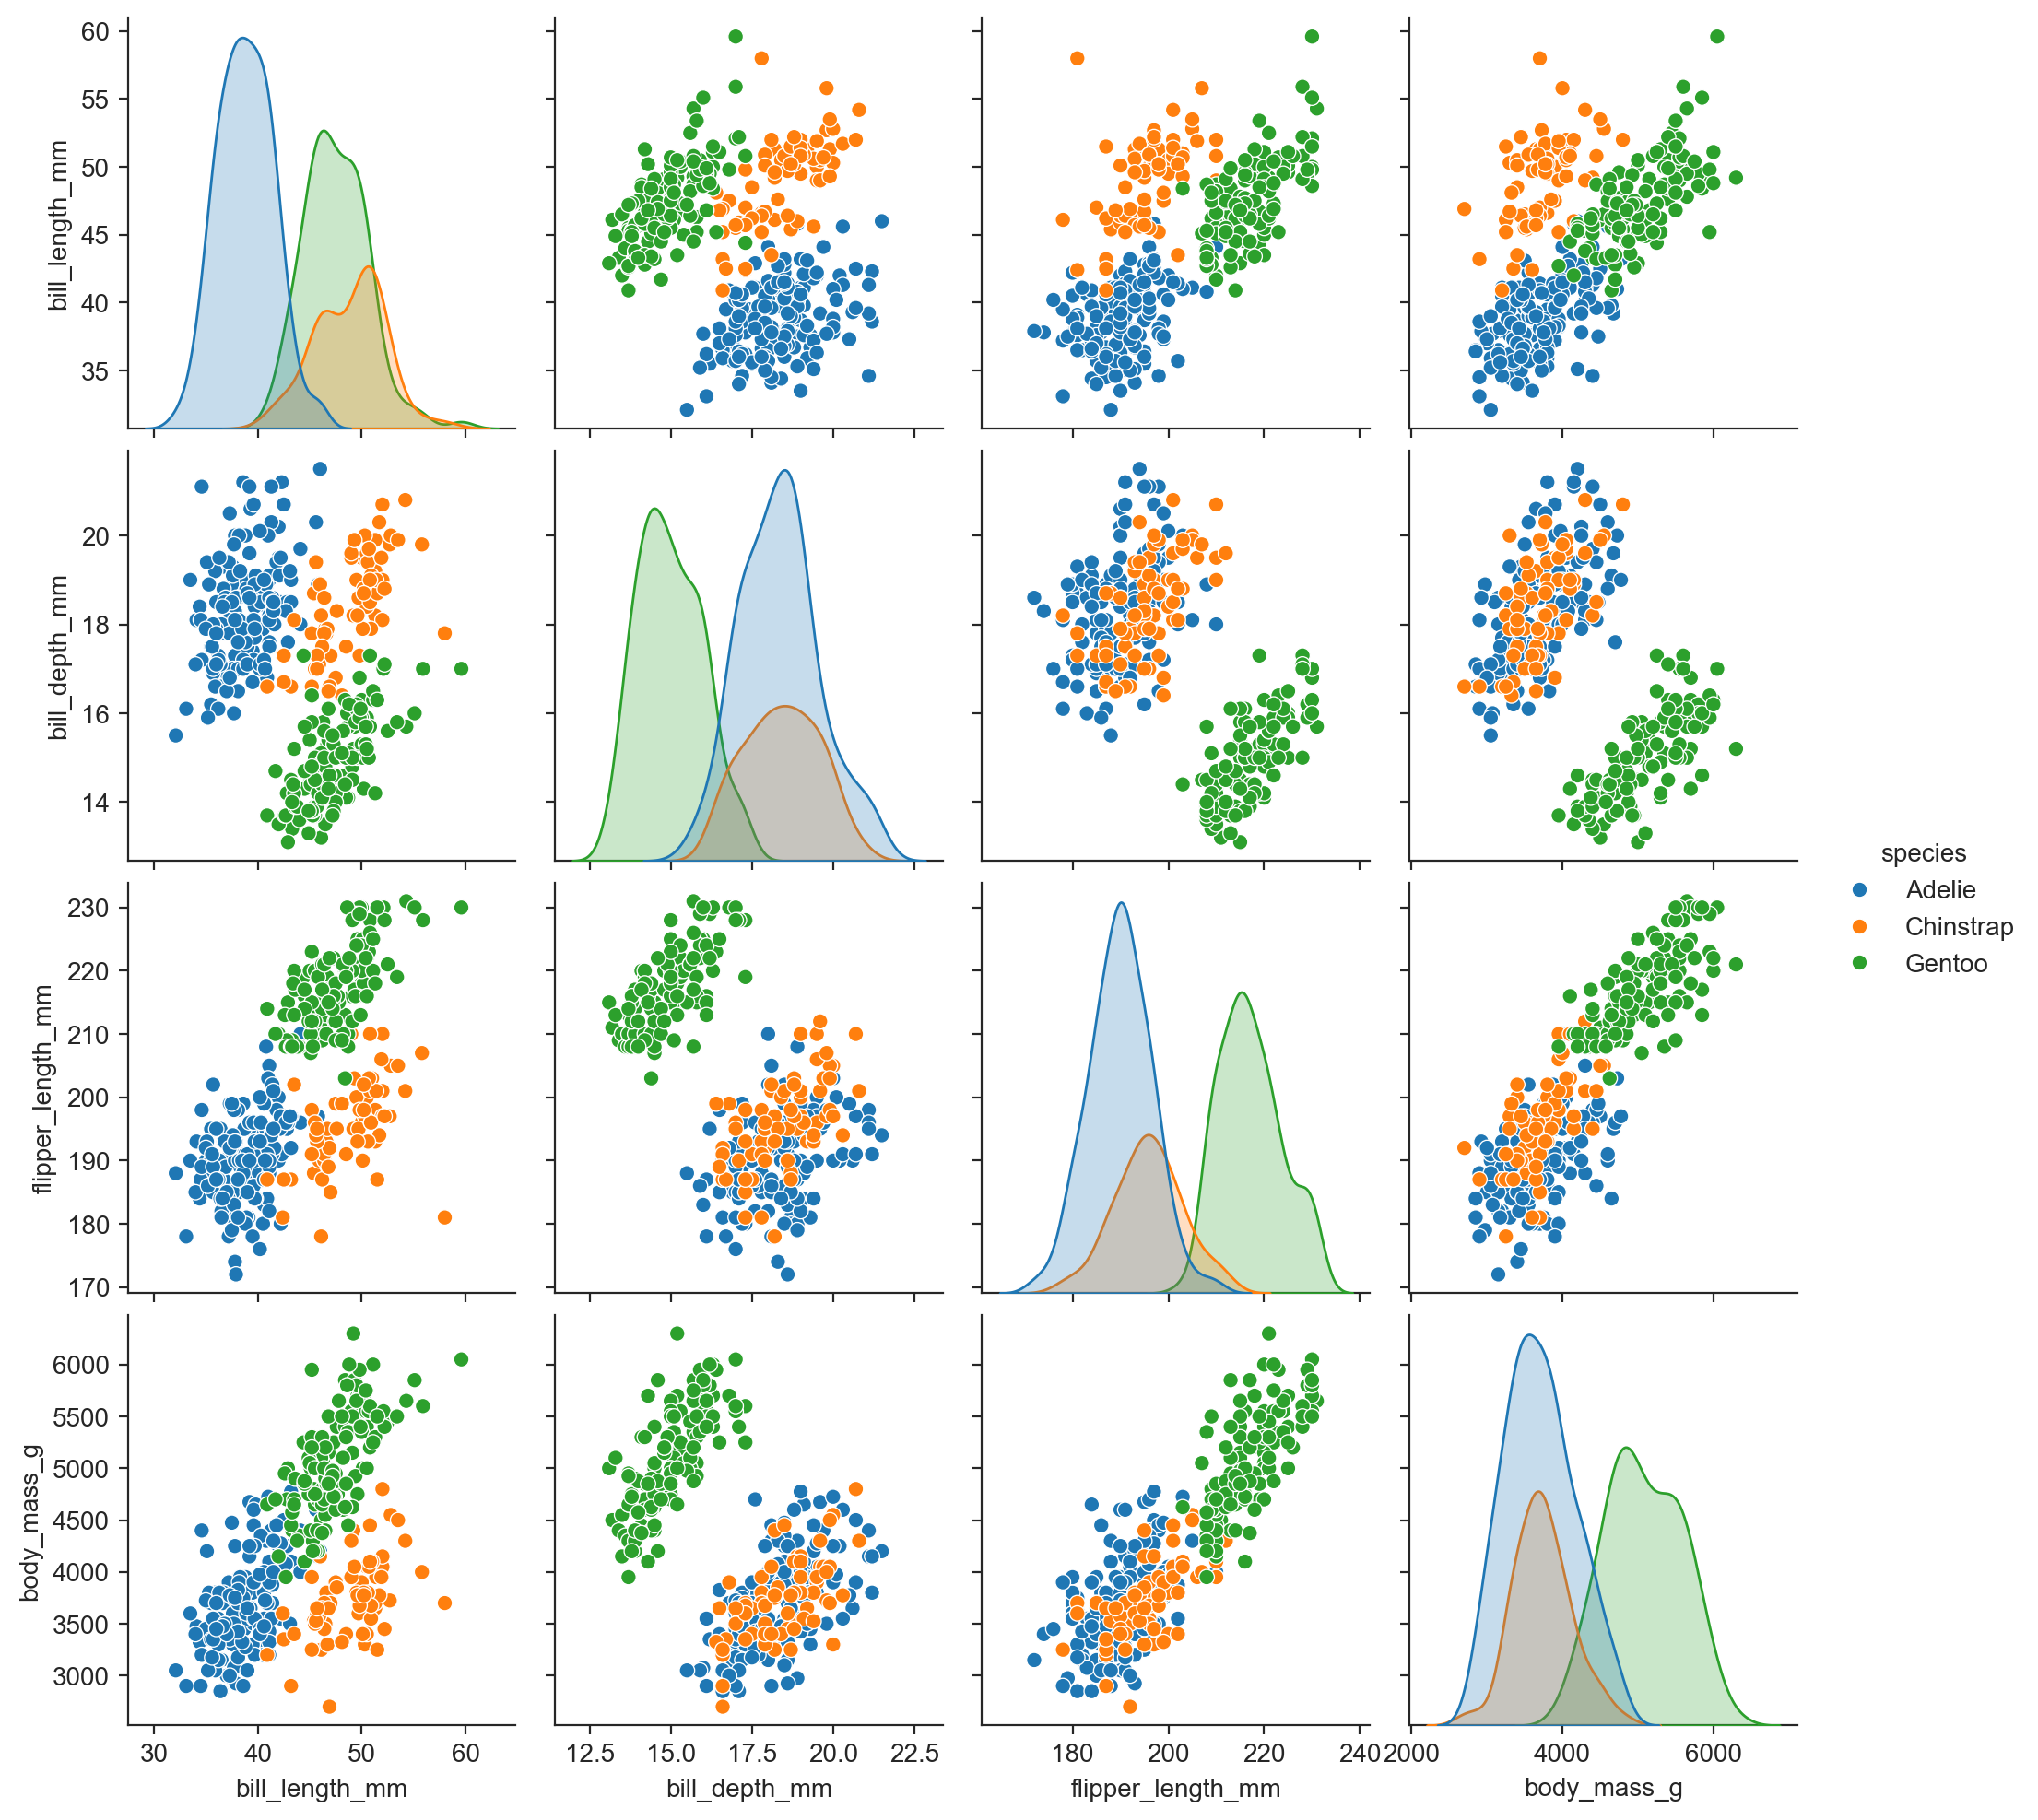

In [104]:
sns.pairplot(penguins, hue="species") ;

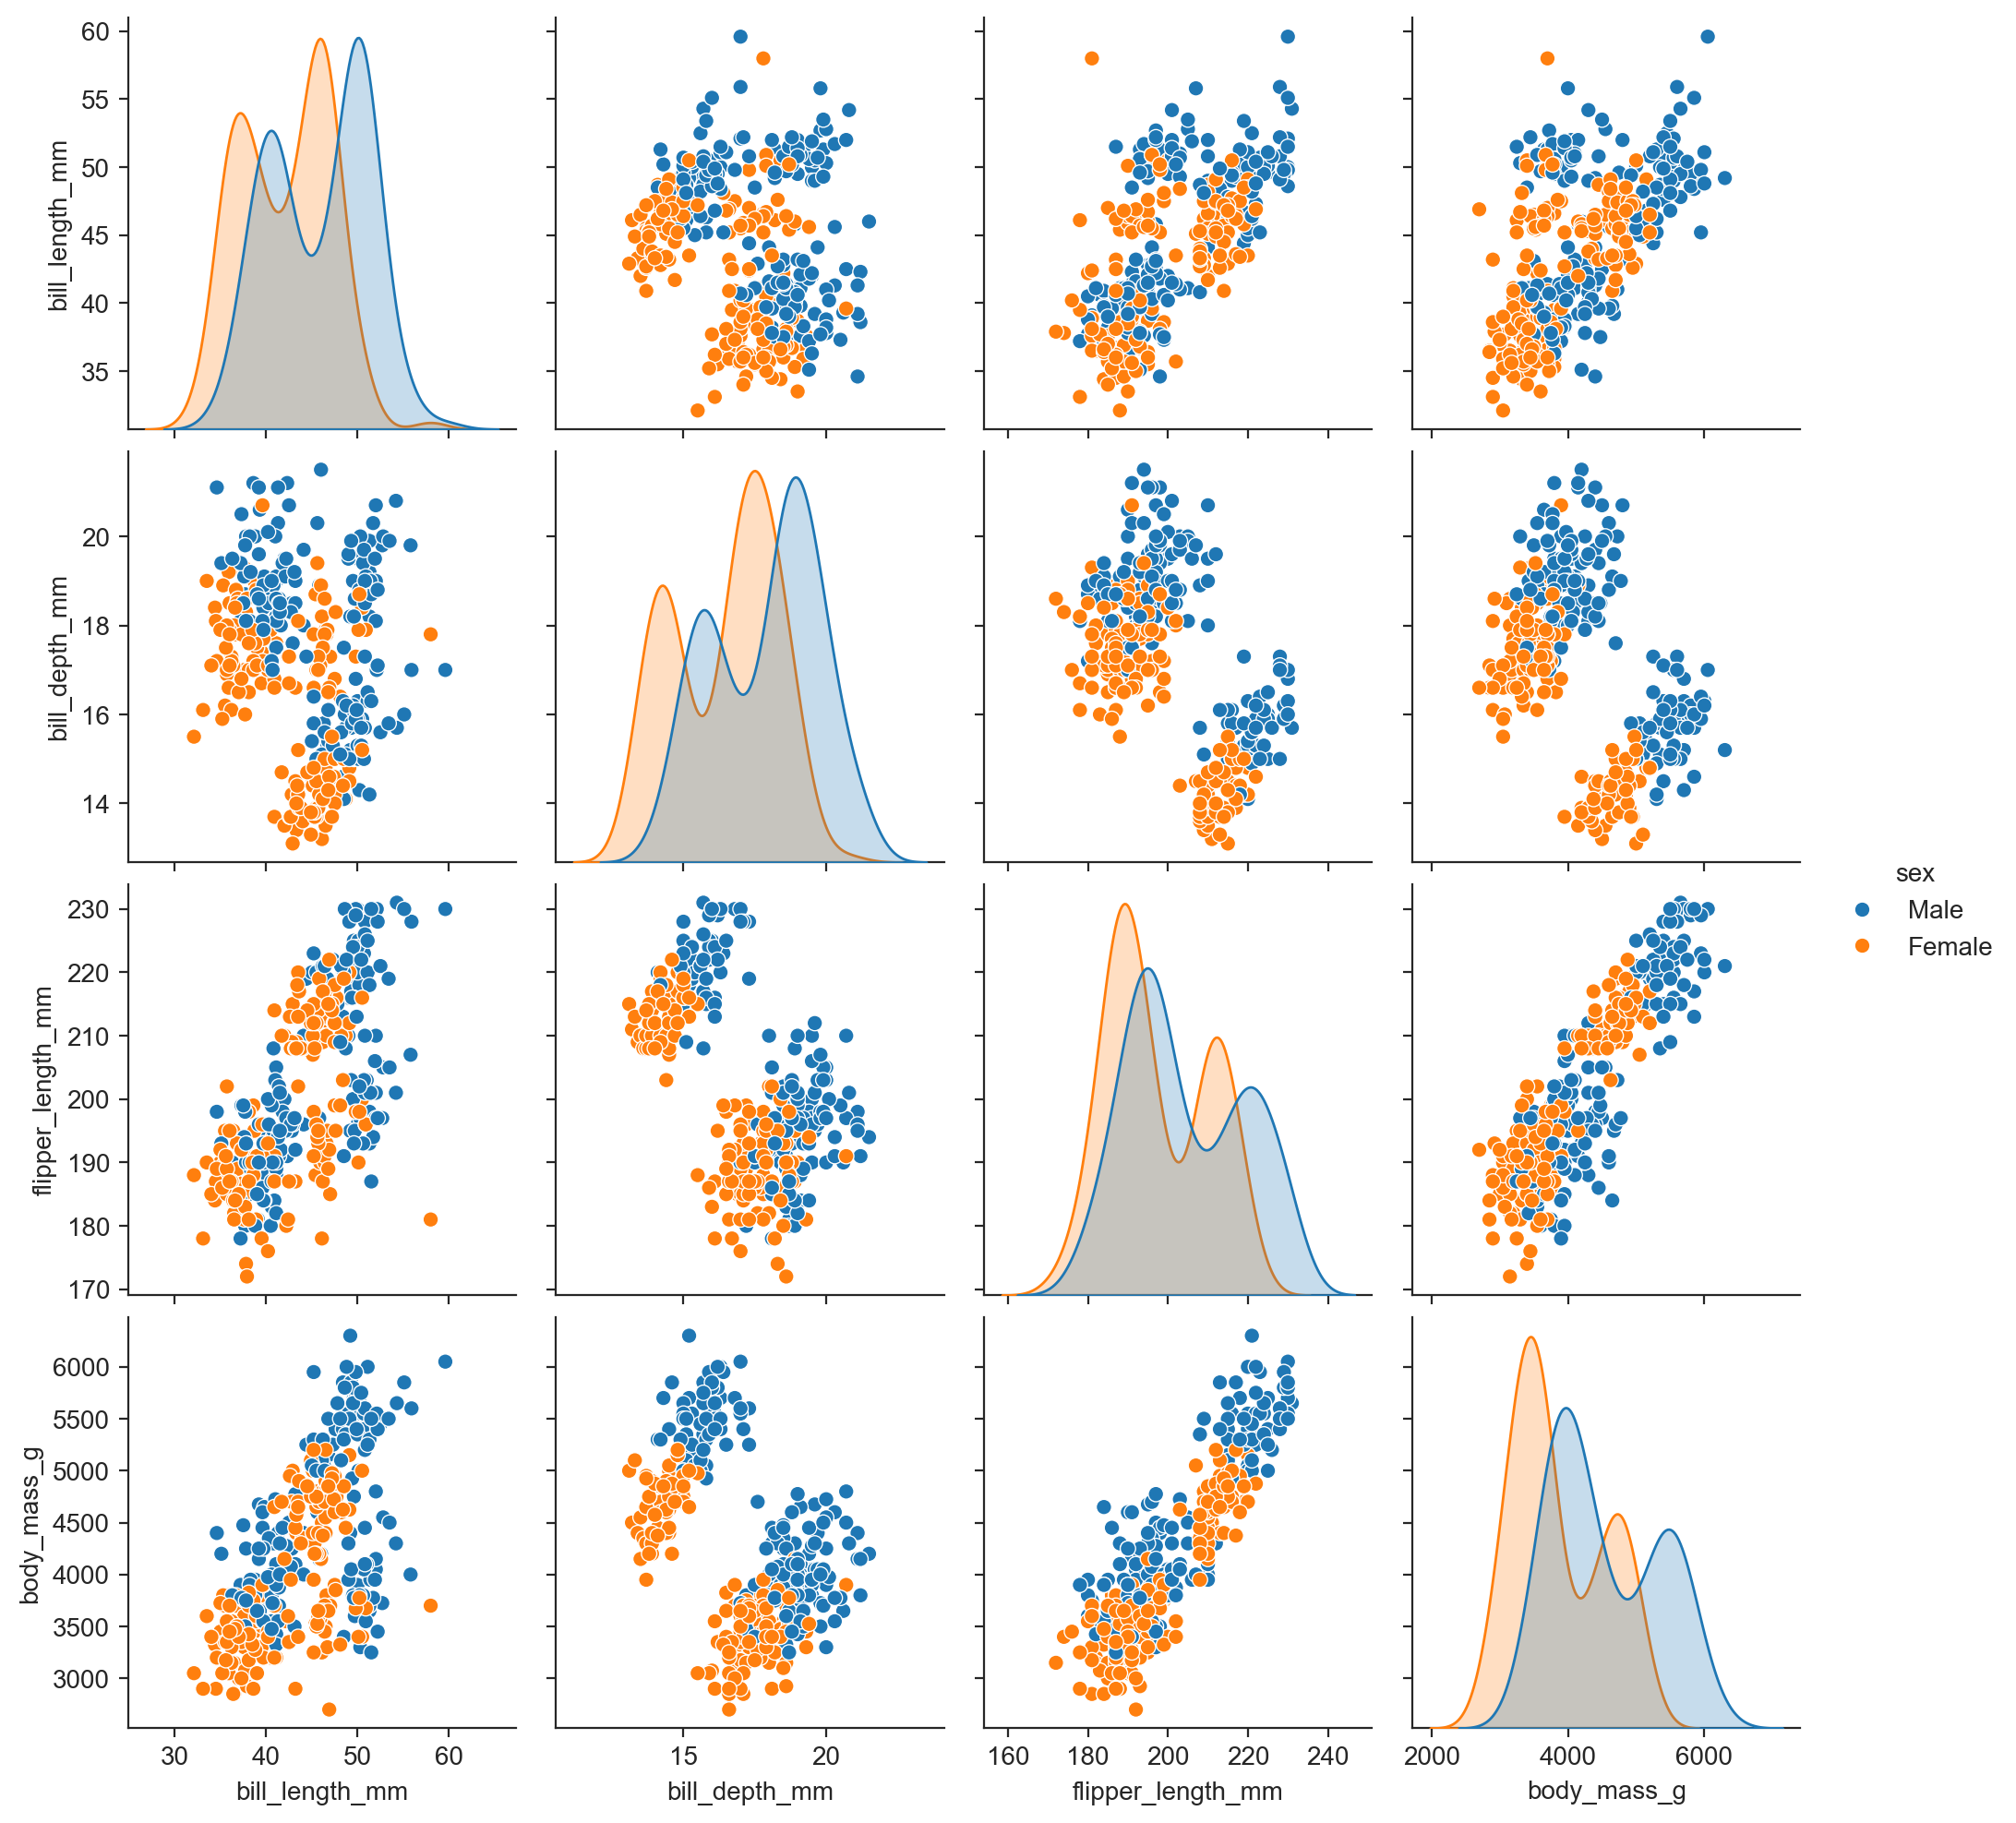

In [105]:
sns.pairplot(penguins, hue="sex") ;